In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
GDP=pd.read_excel(r"C:\Users\iT HOME\PycharmProjects\GDP project file\GDP after preprocessing.xlsx")
GDP.head()

,Country,Region,Population,Area (sq. km.),Pop. Density (per sq. km.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232000,0.188000,0.579000
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101000,0.600000,0.298000
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.150844,0.283873,0.565283
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.150844,0.283873,0.565283


In [3]:
GDP1 = pd.concat([GDP,pd.get_dummies(GDP['Region'], prefix='Region')], axis=1).drop(['Region'],axis=1)
print(GDP1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     227 non-null    object 
 1   Population                                  227 non-null    int64  
 2   Area (sq. km.)                              227 non-null    int64  
 3   Pop. Density (per sq. km.)                  227 non-null    float64
 4   Coastline (coast/area ratio)                227 non-null    float64
 5   Net migration                               227 non-null    float64
 6   Infant mortality (per 1000 births)          227 non-null    float64
 7   GDP ($ per capita)                          227 non-null    float64
 8   Literacy (%)                                227 non-null    float64
 9   Phones (per 1000)                           227 non-null    float64
 10  Arable (%)    

In [4]:
Country_id=np.array(range(0,227))
Country_id

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [5]:
GDP1['Country_id']=Country_id
GDP1['Country']=GDP1['Country'].str.strip()
dic={}
for i in range(0,227):
    dic[GDP1['Country'][i]]=i
dic

{'Afghanistan': 0,
 'Albania': 1,
 'Algeria': 2,
 'American Samoa': 3,
 'Andorra': 4,
 'Angola': 5,
 'Anguilla': 6,
 'Antigua & Barbuda': 7,
 'Argentina': 8,
 'Armenia': 9,
 'Aruba': 10,
 'Australia': 11,
 'Austria': 12,
 'Azerbaijan': 13,
 'Bahamas, The': 14,
 'Bahrain': 15,
 'Bangladesh': 16,
 'Barbados': 17,
 'Belarus': 18,
 'Belgium': 19,
 'Belize': 20,
 'Benin': 21,
 'Bermuda': 22,
 'Bhutan': 23,
 'Bolivia': 24,
 'Bosnia & Herzegovina': 25,
 'Botswana': 26,
 'Brazil': 27,
 'British Virgin Is.': 28,
 'Brunei': 29,
 'Bulgaria': 30,
 'Burkina Faso': 31,
 'Burma': 32,
 'Burundi': 33,
 'Cambodia': 34,
 'Cameroon': 35,
 'Canada': 36,
 'Cape Verde': 37,
 'Cayman Islands': 38,
 'Central African Rep.': 39,
 'Chad': 40,
 'Chile': 41,
 'China': 42,
 'Colombia': 43,
 'Comoros': 44,
 'Congo, Dem. Rep.': 45,
 'Congo, Repub. of the': 46,
 'Cook Islands': 47,
 'Costa Rica': 48,
 "Cote d'Ivoire": 49,
 'Croatia': 50,
 'Cuba': 51,
 'Cyprus': 52,
 'Czech Republic': 53,
 'Denmark': 54,
 'Djibouti': 55

In [6]:
GDP1=GDP1.drop('Country',axis=1)
GDP1.head()

,Population,Area (sq. km.),Pop. Density (per sq. km.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,Country_id
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,1,0,0,0,0,0,0,0,1
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,1,0,0,0,0,2
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,1,0,0,3
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,1,4


In [7]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    return mae, mse, rmse, r2_square

In [8]:
y = GDP1['GDP ($ per capita)']
X = GDP1.drop(['GDP ($ per capita)'], axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,shuffle=True)

In [10]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression()

In [11]:
lm1_pred = lm1.predict(X_test)

In [12]:
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=lm1_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,6.005251e+01
54,31100.000000,2.904566e+04
185,13300.000000,9.459053e+03
80,20000.000000,1.577382e+04
33,600.000000,-2.006963e+03
201,7400.000000,8.391830e+03
37,1400.000000,6.175379e+03
218,4800.000000,6.983420e+03
199,1000.000000,-1.989831e+03
66,22000.000000,2.309225e+04


In [13]:
print('Multiple Linear Regression Performance:')
print('\nall features, No scaling:')
accuracy=lm1.score(X_test,y_test)
train=lm1.score(X_train,y_train) 
results_df = pd.DataFrame(data=[["Linear Regression perfromance",*evaluate(y_test, lm1_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

Multiple Linear Regression Performance:

all features, No scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,Linear Regression perfromance,322265.166745,2.344640e+12,1.531222e+06,-28720.034558,0.814451,-28720.034558


[-7.65423935e-06  6.52088639e-04 -3.24661471e-01 -2.73541123e+00
  2.87696389e+02  1.68476559e+00  1.40354859e+01  2.22735778e+01
 -7.33634774e+04 -7.33859694e+04 -7.33421092e+04  4.39709598e+02
 -1.42838328e+02  8.49925386e+00 -1.64421576e+04 -8.10334697e+03
 -5.81070950e+03  1.19365850e+03 -1.80618663e+03 -4.13839931e+03
 -2.64656935e+03 -2.23220092e+03 -1.55533202e+02 -8.04028064e+02
  1.42390967e+03  8.76138613e+02  9.12783716e+02  7.37642698e+03
 -2.68324791e+00]


<AxesSubplot:>

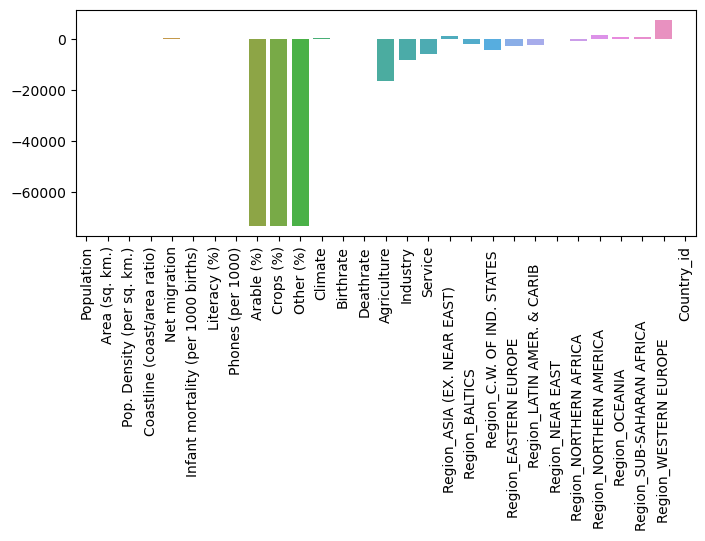

In [14]:
fi=np.array(lm1.coef_)
print(fi)
plt.figure(figsize=(8,3),dpi=100)
plt.xticks(rotation=90)
sns.barplot(x=X.columns,y=fi)

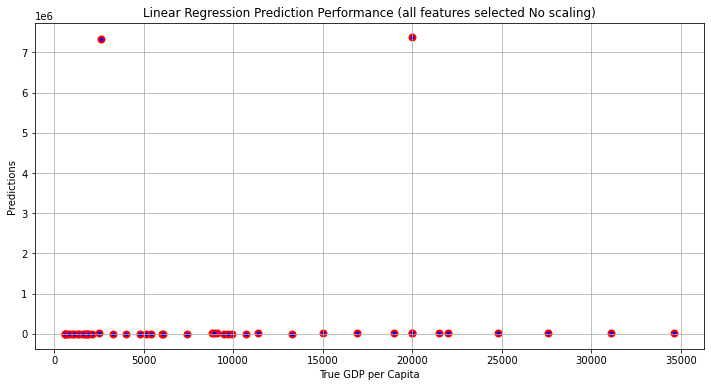

In [15]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,lm1_pred,color='blue', linewidths=2, edgecolors='red')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (all features selected No scaling)') 
plt.grid()
plt.show()

In [16]:
sc_X = StandardScaler()
X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test
X2_train

array([[-0.02392367, -0.27931445, -0.13110433, ..., -0.53262364,
        -0.35245369,  0.51695269],
       [ 0.01166196,  1.15504298, -0.22766386, ..., -0.53262364,
        -0.35245369, -1.67617737],
       [-0.17793524, -0.31995361, -0.18225274, ..., -0.53262364,
         2.83725219, -1.52281163],
       ...,
       [-0.24004166, -0.37356872, -0.09397437, ..., -0.53262364,
        -0.35245369, -0.46458803],
       [-0.08541607,  4.56037884, -0.23372589, ..., -0.53262364,
        -0.35245369, -1.5381482 ],
       [ 1.64053183,  0.85829385, -0.1659069 , ..., -0.53262364,
        -0.35245369, -0.249876  ]])

In [17]:
lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

LinearRegression()

In [18]:
lm2_pred = lm2.predict(X2_test)
dfff = pd.DataFrame(data=y2_test)
df9 = pd.DataFrame(data=lm2_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,-1.414106e+05
54,31100.000000,-1.312999e+06
185,13300.000000,-7.111728e+05
80,20000.000000,1.897430e+05
33,600.000000,-1.081625e+06
201,7400.000000,-7.653630e+05
37,1400.000000,-1.003610e+05
218,4800.000000,8.071322e+04
199,1000.000000,-2.975101e+04
66,22000.000000,1.362626e+05


In [19]:
print('Multiple Linear Regression Performance:')
print('\nall features, with scaling:')
accuracy=lm2.score(X2_test,y2_test)
train=lm2.score(X2_train,y2_train) 
results_df = pd.DataFrame(data=[["Linear Regression perfromance",*evaluate(y2_test, lm2_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

Multiple Linear Regression Performance:

all features, with scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,Linear Regression perfromance,554570.450502,1.565412e+12,1.251164e+06,-19174.758383,0.814451,-19174.758383


[-9.98667387e+02  1.01587688e+03 -5.99833138e+02 -2.17467563e+02
  1.41578033e+03  6.10606269e+01  2.75739453e+02  4.98913126e+03
 -9.74030394e+05 -6.10284269e+05 -1.20548667e+06  3.95362576e+02
 -1.61151386e+03  4.32162021e+01 -2.31863601e+03 -1.07766155e+03
 -9.42683710e+02  2.53160798e+02 -2.87688933e+02 -9.96783272e+02
 -7.06812229e+02 -1.05819499e+03 -1.55616491e+02 -2.05064713e+02
  1.43586689e+02  1.28372159e+02  1.93188413e+02  2.17237926e+03
 -1.74957454e+02]


<AxesSubplot:>

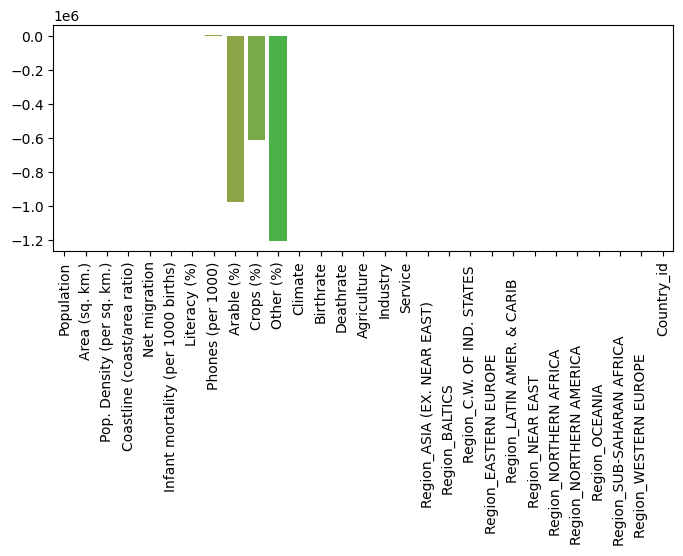

In [20]:
fi=np.array(lm2.coef_)
print(fi)
plt.figure(figsize=(8,3),dpi=100)
plt.xticks(rotation=90)
sns.barplot(x=X.columns,y=fi)

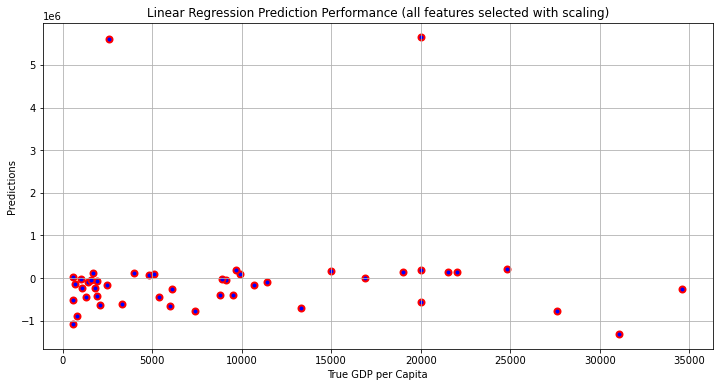

In [21]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,lm2_pred,color='blue', linewidths=2, edgecolors='red')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (all features selected with scaling)') 
plt.grid()
plt.show()

In [23]:
y3 = y
X3 = GDP1.drop(['GDP ($ per capita)','Population', 'Area (sq. km.)', 'Arable (%)','Crops (%)',
                        'Climate',"Agriculture"], axis=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101,shuffle=True)

In [24]:
lm3 = LinearRegression()
lm3.fit(X3_train,y3_train)

LinearRegression()

In [25]:
lm3_pred = lm3.predict(X3_test)
dfff = pd.DataFrame(data=y3_test)
df9 = pd.DataFrame(data=lm3_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,-88.027271
54,31100.000000,27987.052947
185,13300.000000,9025.896831
80,20000.000000,17488.144566
33,600.000000,-2085.825707
201,7400.000000,7613.661697
37,1400.000000,5717.248668
218,4800.000000,6833.295903
199,1000.000000,-1726.236277
66,22000.000000,24546.134481


In [26]:
print('Multiple Linear Regression Performance:')
print('\nall features, No scaling:')
accuracy=lm3.score(X3_test,y3_test)
train=lm3.score(X3_train,y3_train) 
results_df = pd.DataFrame(data=[["Linear Regression perfromance",*evaluate(y_test, lm3_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

Multiple Linear Regression Performance:

all features, No scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,Linear Regression perfromance,2949.790819,1.657081e+07,4070.725847,0.797013,0.804448,0.797013


[-3.54202267e-01 -4.33915975e+00  2.97313474e+02 -1.02832633e+01
  1.91259251e+01  2.20213556e+01  4.53306429e+01 -1.12559280e+02
  3.54194680e+01  8.14054817e+03  1.06359509e+04  4.06531186e+02
 -1.92560666e+03 -3.82396141e+03 -2.68540016e+03 -2.52383771e+03
 -8.48341822e+01 -1.11220929e+03  3.34619474e+03  7.17843162e+02
  5.44339908e+02  7.14094042e+03 -4.09207333e+00]


<AxesSubplot:>

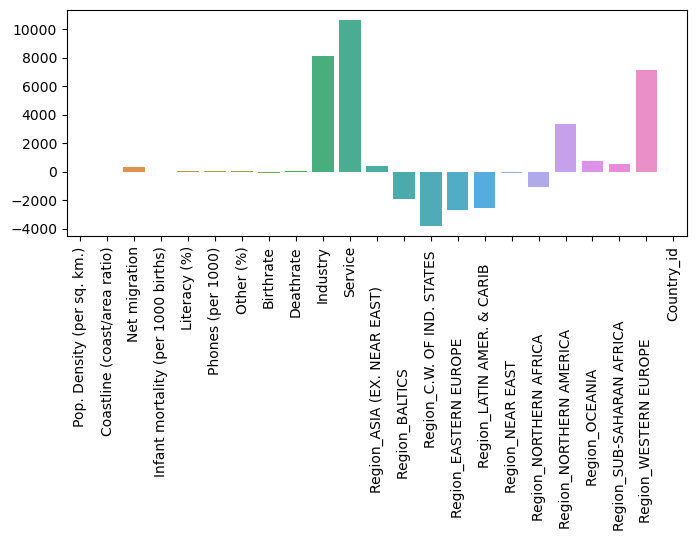

In [27]:
fi=np.array(lm3.coef_)
print(fi)
plt.figure(figsize=(8,3),dpi=100)
plt.xticks(rotation=90)
sns.barplot(x=X3.columns,y=fi)

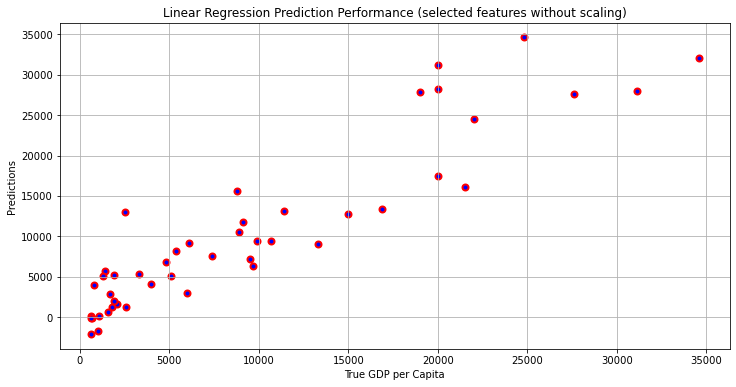

In [28]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,lm3_pred,color='blue', linewidths=2, edgecolors='red')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (selected features without scaling)') 
plt.grid()
plt.show()

In [29]:
sc_X4 = StandardScaler()
X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

In [30]:
lm4 = LinearRegression()
lm4.fit(X4_train,y4_train)

LinearRegression()

In [31]:
lm4_pred = lm4.predict(X4_test)
dfff = pd.DataFrame(data=y4_test)
df9 = pd.DataFrame(data=lm4_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,-458.713581
54,31100.000000,26954.041448
185,13300.000000,8996.363809
80,20000.000000,17126.793038
33,600.000000,-2663.761634
201,7400.000000,7782.774628
37,1400.000000,5023.766655
218,4800.000000,6941.844277
199,1000.000000,-1537.554371
66,22000.000000,22556.235427


In [32]:
print('Multiple Linear Regression Performance:')
print('\nall features, with scaling:')
accuracy=lm4.score(X4_test,y4_test)
train=lm4.score(X4_train,y4_train) 
results_df = pd.DataFrame(data=[["Linear Regression perfromance",*evaluate(y_test, lm4_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

Multiple Linear Regression Performance:

all features, with scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,Linear Regression perfromance,2890.616565,1.405504e+07,3749.004822,0.827831,0.804448,0.827831


[ -654.41167602  -344.96695928  1463.10689509  -372.69428478
   375.74560273  4932.63518921   745.07655122 -1269.90313901
   180.0975602   1082.60892577  1725.49283972    60.15603974
  -275.10007767  -881.04009335  -665.87288512 -1087.26768887
   -81.06967708  -219.84093783   458.22712586   146.2466271
   130.77669609  2166.90458645  -266.81795959]


<AxesSubplot:>

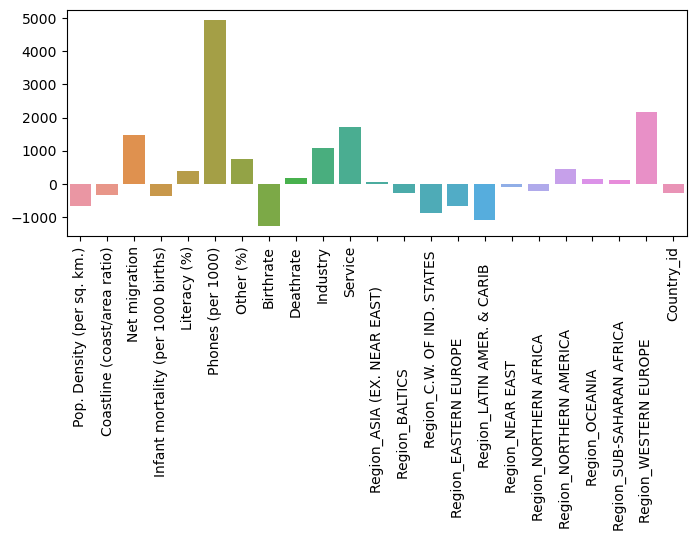

In [33]:
fi=np.array(lm4.coef_)
print(fi)
plt.figure(figsize=(8,3),dpi=100)
plt.xticks(rotation=90)
sns.barplot(x=X3.columns,y=fi)

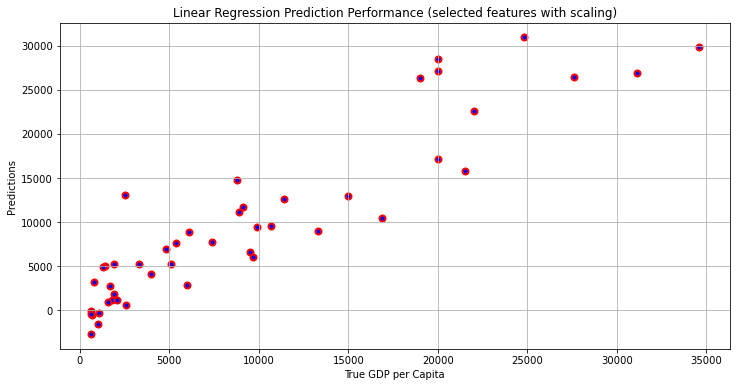

In [34]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,lm4_pred,color='blue', linewidths=2, edgecolors='red')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (selected features with scaling)') 
plt.grid()
plt.show()

In [35]:
GDP1.to_excel('GDP after dummies.xlsx')